# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
boston = pd.read_csv('../data/boston_data.csv')

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [5]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
import scipy.stats as stats
zs = stats.zscore(boston)
abs_zs = np.abs(zs)
no_outliers = (abs_zs < 3).all(axis=1)
boston = boston[no_outliers]

In [7]:
boston['chas'].value_counts()

0.0    321
Name: chas, dtype: int64

In [8]:
boston.drop(['chas'], axis = 1, inplace = True)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [11]:
corr_medv = boston.drop(columns = 'medv')
medv = boston['medv']

In [12]:
corr_medv.corrwith(medv)

crim      -0.504009
zn         0.342641
indus     -0.565210
nox       -0.467456
rm         0.712762
age       -0.454210
dis        0.314168
rad       -0.425741
tax       -0.535400
ptratio   -0.471788
black      0.282290
lstat     -0.754075
dtype: float64

In [14]:
corr = boston.drop(columns=['crim','zn','indus','nox','black','dis','ptratio'],axis=1)

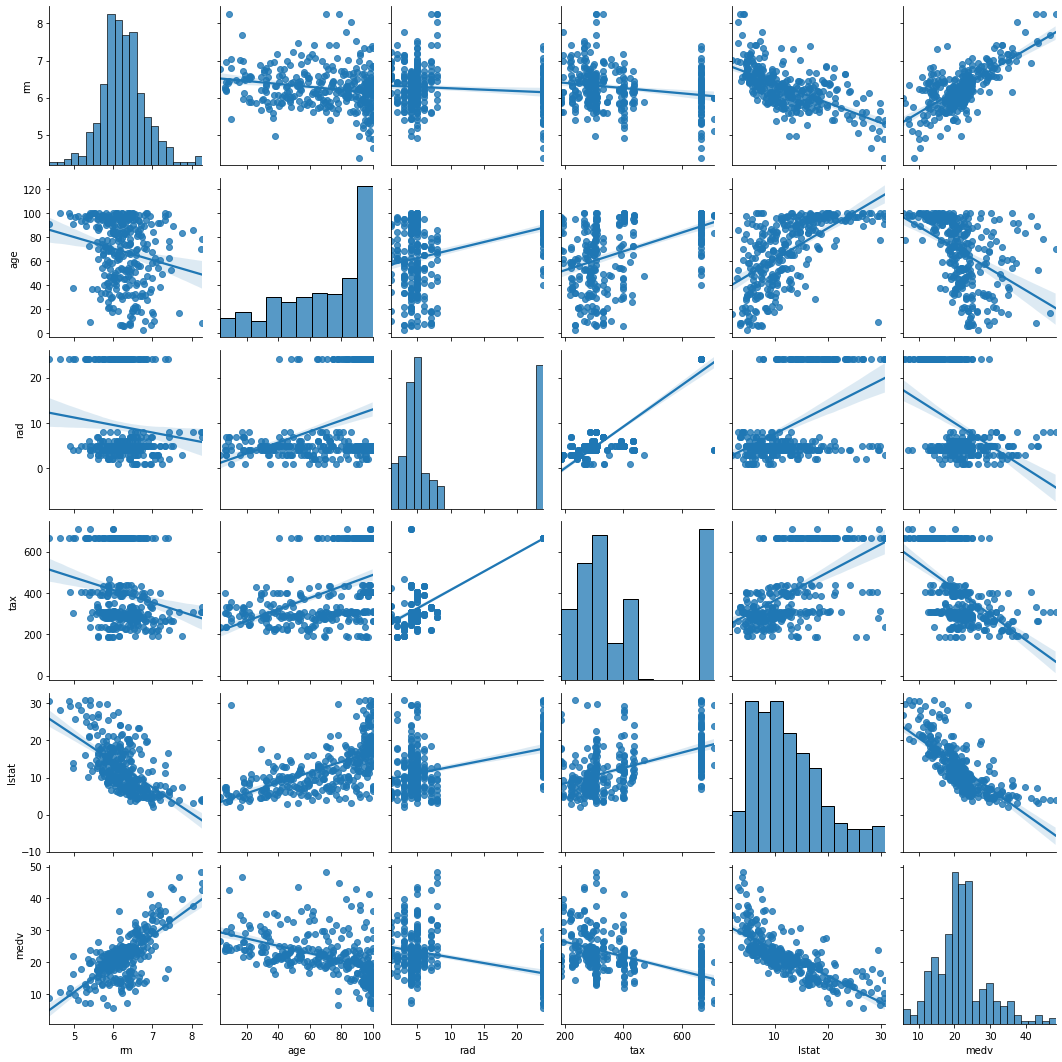

In [16]:
import seaborn as sns

sns.pairplot(data=corr, kind='reg')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [17]:
# not as correlated as expected indeed which is not OK, in real life is completely the opposite 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

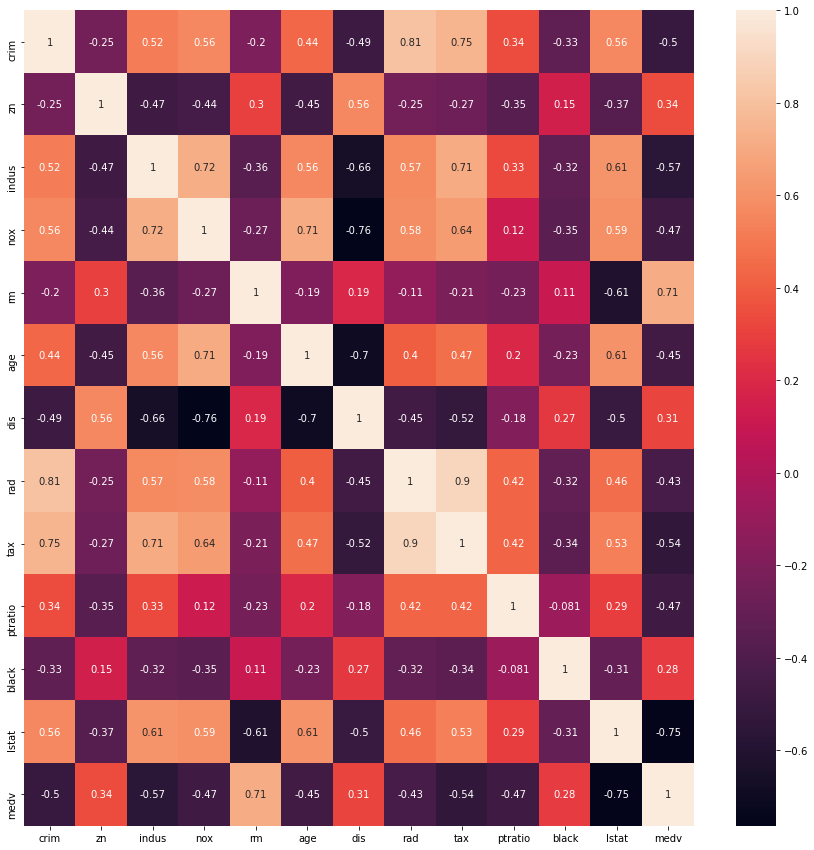

In [22]:
heatmap = boston.select_dtypes(['int64', 'float64'])

corr2 = boston.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr2, annot=True, ax=ax)
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [23]:
boston['medv'].describe()

count    321.000000
mean      21.783489
std        7.122202
min        5.600000
25%       17.800000
50%       21.200000
75%       24.600000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    r2 = r2_score(y_true, y_pred)
    return r2

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [25]:
from sklearn.model_selection import train_test_split

X = boston.drop(columns = 'medv')
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 77)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [27]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

max_depth = [2, 4, 6, 8, 10]
r2_train = [] 
r2_test = []

for k in max_depth:
    rfr = RandomForestRegressor(max_depth=k)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_train)
    y_test_pred = rfr.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    print('For k =', k,',', 'the training set r2 score is:',r2_score(y_train, y_pred), 
          'and the test set r2 score is:',r2_score(y_test, y_test_pred))

For k = 2 , the training set r2 score is: 0.8019440047640537 and the test set r2 score is: 0.6840332691160389
For k = 4 , the training set r2 score is: 0.9140865411326915 and the test set r2 score is: 0.7094653394785864
For k = 6 , the training set r2 score is: 0.9586334186700102 and the test set r2 score is: 0.7367599850674921
For k = 8 , the training set r2 score is: 0.973737804668167 and the test set r2 score is: 0.7376930873312482
For k = 10 , the training set r2 score is: 0.9779402915412668 and the test set r2 score is: 0.7396319669020478


Now, plot the score for each tree on the training set and on the testing set.

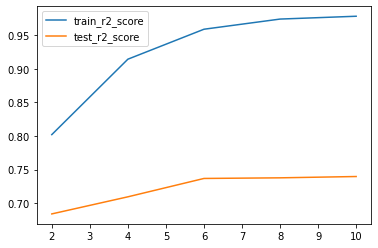

In [32]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(max_depth, r2_train, label='train_r2_score')
plt.plot(max_depth, r2_test, label='test_r2_score')
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [33]:
# in my opinion 6 is the optimal here, underfit before overfit after if the sampling is good enough, of course

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [34]:
# well, I'm a step ahead :) 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [35]:
# c'mon, seriously?!?

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [36]:
# NO WAY !!! 
# Actually from the first time we worked with this dataset in class it didn't look at all like in real life, AT ALL!